In [12]:
# Load various imports 
import pandas as pd
import numpy as np

import os
import librosa
import librosa.display
from scipy.io import wavfile
import matplotlib.pyplot as plt
import IPython.display as ipd

In [17]:
def loadAndPlot(path, file_name, number_of_colums, index):
    # Display waveplot, spectogram and mfccs
    samples, sample_rate = librosa.load(path + '/' + file_name)    
    
    sp = plt.subplot(30, number_of_colums, index + 1)    
    #sp.axes.get_xaxis().set_visible(False)
    #sp.axes.get_yaxis().set_visible(False)
    sp.set_frame_on(False)
    sp.title.set_text('Size: ' + str(len(samples)) + ' Rate: ' + str(sample_rate))
    
    librosa.display.waveplot(samples, sr=sample_rate)
        
    sp = plt.subplot(30, number_of_colums, index + number_of_colums + 1)    
    #sp.axes.get_xaxis().set_visible(False)
    #sp.axes.get_yaxis().set_visible(False)
    sp.set_frame_on(False)    
    S = librosa.feature.melspectrogram(y=samples, sr=sample_rate)    
    S_dB = librosa.power_to_db(S, ref=np.max)
    sp.title.set_text(S_dB.shape)
    
    librosa.display.specshow(S_dB, cmap='Spectral', x_axis='time',
                          y_axis='mel', sr=sample_rate,
                          fmax=8000)    
    #sp.title.set_text('Size: ' + str(len(S_dB)) + ' Rate: ' + str(sample_rate))
   
    sp = plt.subplot(30, number_of_colums, index + number_of_colums*2 + 1)    
    #sp.axes.get_xaxis().set_visible(False)
    #sp.axes.get_yaxis().set_visible(False)
    sp.set_frame_on(False)  
   
    #mfccs = librosa.feature.mfcc(y=samples, sr=sample_rate, n_mfcc=40)        
    S = librosa.feature.melspectrogram(y=samples, sr=sample_rate, n_mels=128,
                                       fmax=8000)
    S_dB = librosa.power_to_db(S, ref=np.max)
    #mfccs = librosa.feature.mfcc(S_dB, n_mfcc=40)
    #mfccs = librosa.feature.mfcc(y=samples, sr=sample_rate)
    mfccs = librosa.feature.mfcc(y=samples, sr=sample_rate, n_mfcc=40)
    #audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    #mfccsscaled = np.mean(mfccs.T,axis=0)
    
    librosa.display.specshow(mfccs, cmap='Spectral', x_axis='time')

In [18]:
    # Used to visualize the 
    samples, sample_rate = librosa.load(recordingsPath + '/' + fileList[column])    
    
    S = librosa.feature.melspectrogram(y=samples, sr=sample_rate)    
    S_dB = -librosa.power_to_db(S, ref=np.max)
    S_dB = S_dB
    S_dBflat = list(np.array(S_dB).flat)
    # Display first 20
    S_dBflat[:20]
    

[60.199287,
 63.731827,
 67.021805,
 68.91216,
 79.789696,
 70.49567,
 68.28467,
 68.99071,
 69.31742,
 71.98243,
 68.72614,
 67.43525,
 66.68881,
 69.54988,
 66.70012,
 65.9157,
 67.680145,
 67.64408,
 65.99921,
 66.58]

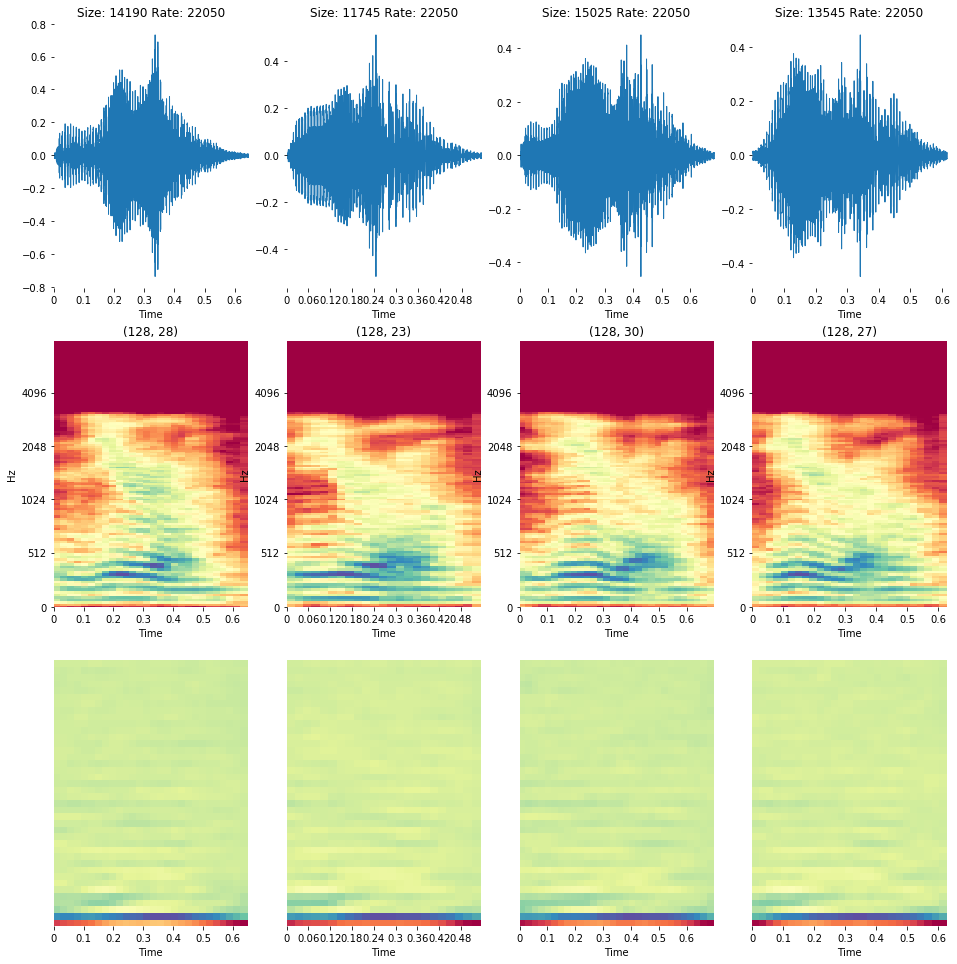

In [19]:
fig = plt.figure(figsize=[4,500]) 
#fig = plt.gcf()
number_of_colums = 4
fig.set_size_inches(number_of_colums*4, 175)

recordingsPath = os.getcwd() + '/recordings'
#fileList = os.listdir(recordingsPath)

# Set the range number from 1=zero to 10=9 to display
for number in range(1):
    fileList = [fn for fn in os.listdir(recordingsPath)
              if fn.startswith(str(number))][:number_of_colums]
 
    for column in range(number_of_colums):        
        loadAndPlot (recordingsPath, fileList[column], number_of_colums, (number * number_of_colums * 3) + column)

fig.show()

# Add a wav player for last loaded sample. This line must always be the last in a widget.
# No code or comment lines after this line
ipd.Audio(data=samples, rate=sample_rate)